In [2]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import os.path as op
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

In [4]:
# Import data from path
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("results")) for f in fn]
results_files = [f for f in files if ".csv" in f]
tmp = []
for f in results_files:
    df_tmp = pd.read_csv(f)
    tmp.append(df_tmp)

In [5]:
df_concat = pd.concat(tmp)
df_concat['dataset'].value_counts()

natural      972
synthetic    972
Name: dataset, dtype: int64

In [6]:
# save for R
df_concat.to_csv('normalization_results.csv', index=False)

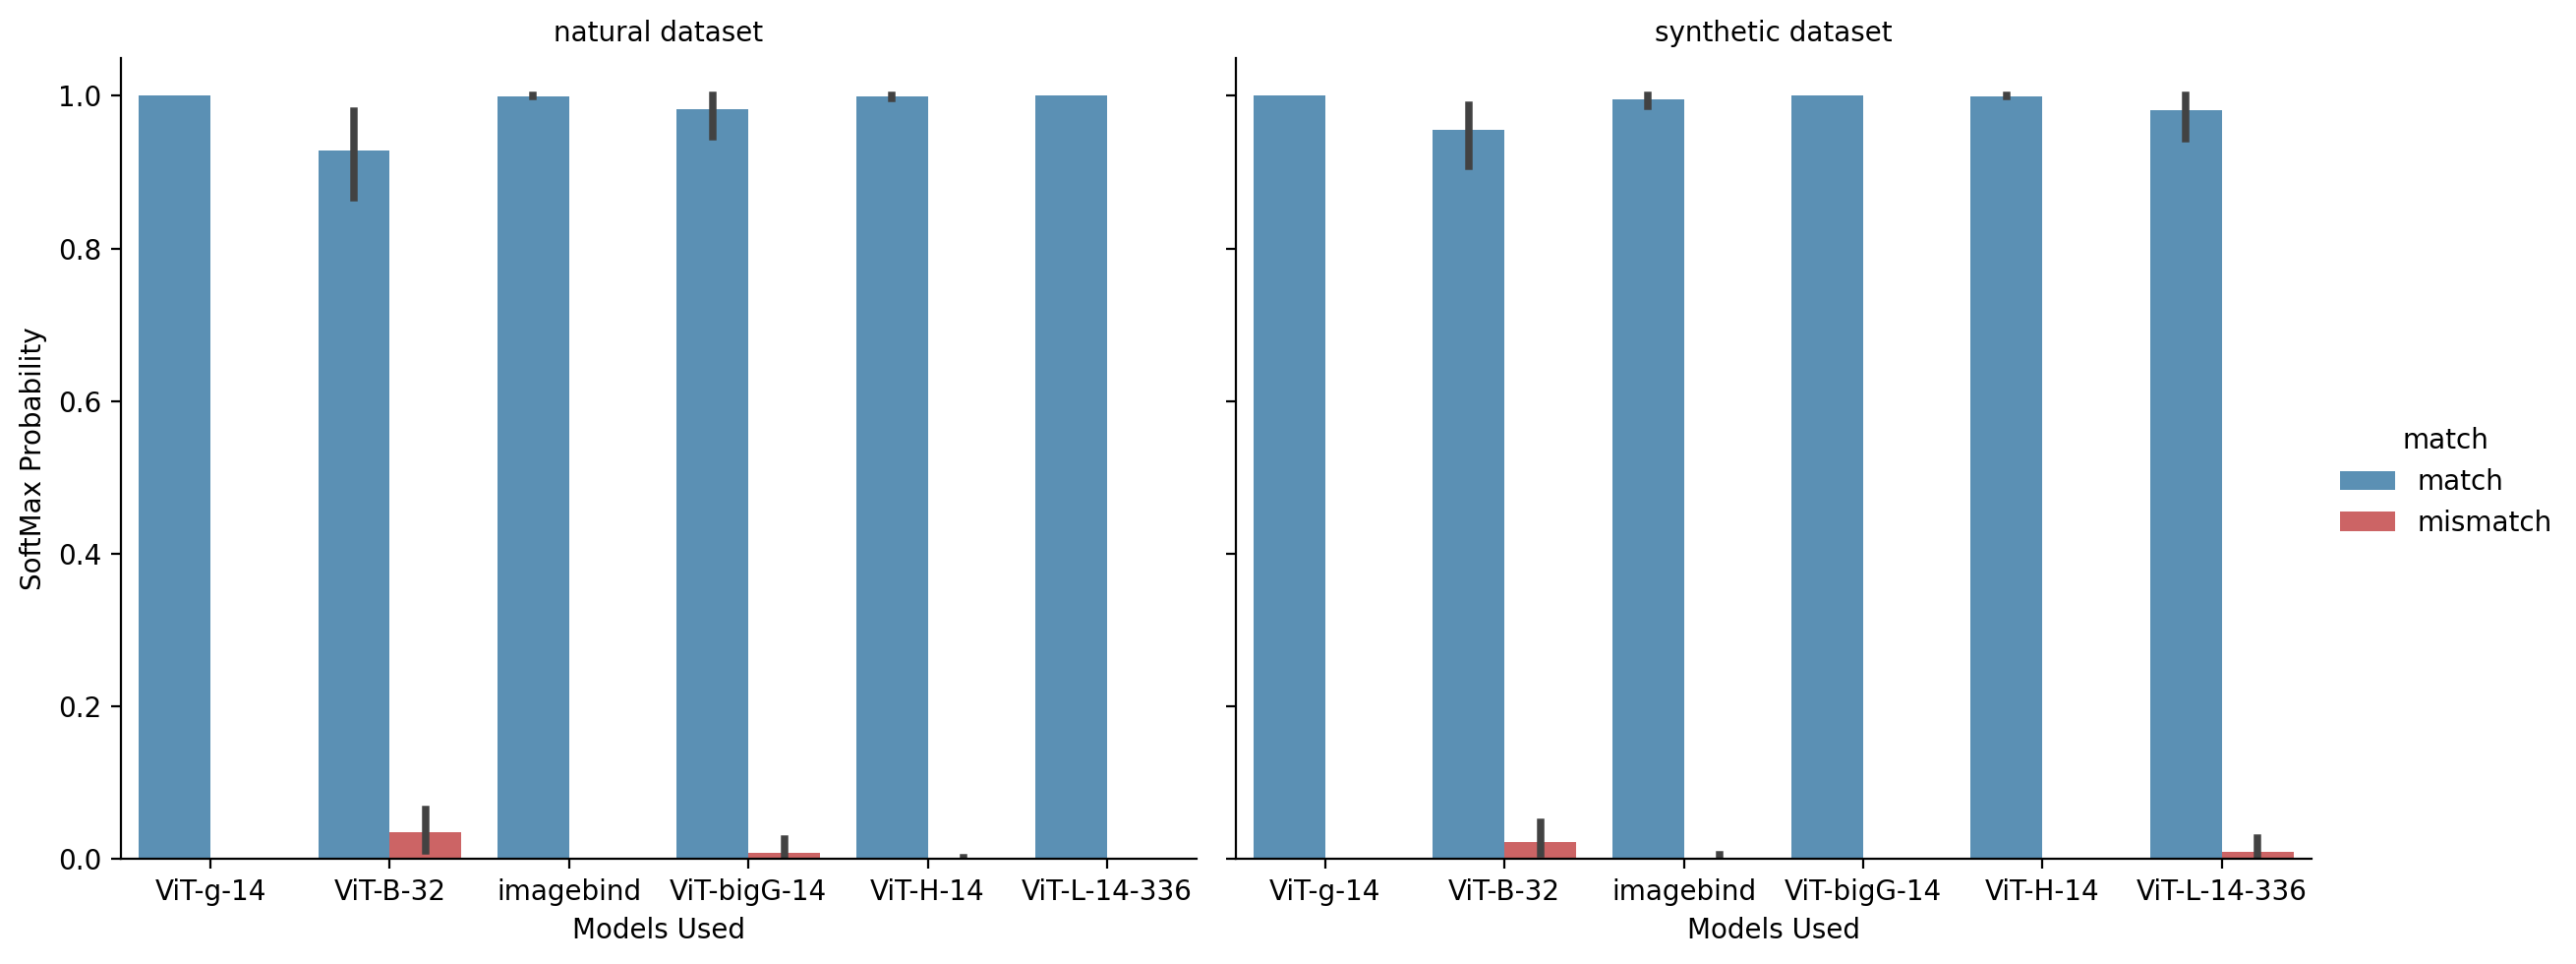

In [11]:
# Plots of Data
plot = sns.catplot(data = df_concat,
            x = "model",
            y = "probability",
            hue = "match",
            col = "dataset",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C3'],
            alpha= 0.8)
plot.set_titles("{col_name} dataset")
plot.set_axis_labels('Models Used','SoftMax Probability')

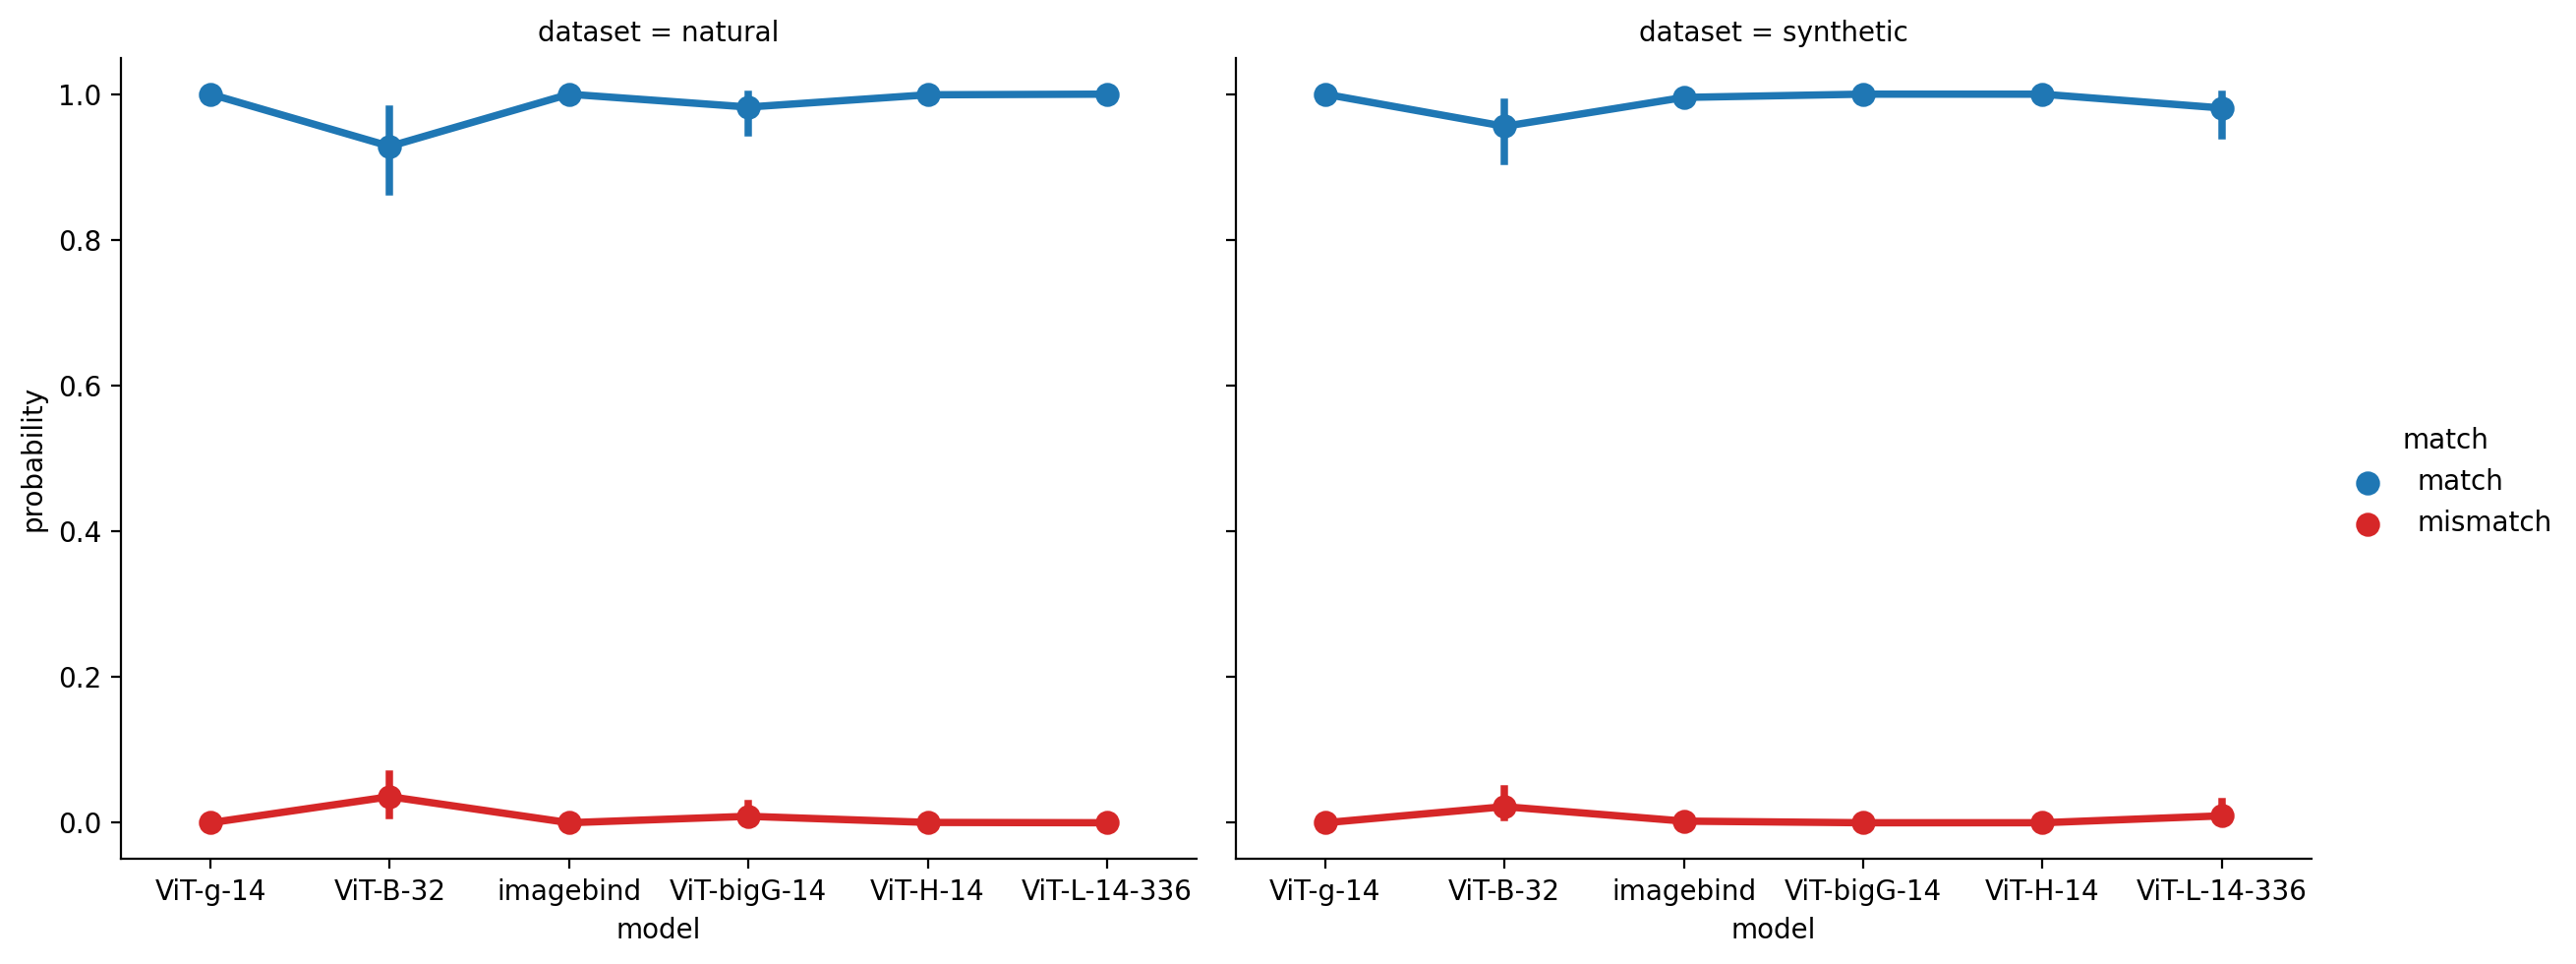

In [8]:
sns.catplot(data = df_concat,
            x = "model",
            y = "probability",
            hue = "match",
            col = "dataset",
            kind = "point",
            height= 5,
            aspect=1.2,
            palette= ['C0','C3'])

In [9]:
#Mixed Model Analysis Grouped by Models
data = df_concat.get(['match','probability','model'])
md = smf.mixedlm("probability ~ match", data, groups = data["model"])
mdf = md.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  probability
No. Observations:    1944     Method:              REML       
No. Groups:          6        Scale:               0.0060     
Min. group size:     324      Log-Likelihood:      2193.3375  
Max. group size:     324      Converged:           No         
Mean group size:     324.0                                    
--------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept          0.987    0.051   19.212 0.000  0.886  1.088
match[T.mismatch] -0.980    0.004 -263.703 0.000 -0.988 -0.973
Group Var          0.016                                      



/Users/kevinb/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kevinb/anaconda3/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/kevinb/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kevinb/anaconda3/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/kevinb/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret